<a href="https://colab.research.google.com/github/Nyma-03/Data_Processing_Price_Calculation/blob/main/Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
import numpy as np

In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/Data_of_car_prices.csv", names=["Mileage","Age","Sell_Price"], skiprows=[0])
df

,Mileage,Age,Sell_Price
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [96]:
df.Sell_Price.describe()

,Sell_Price
count,20.000000
mean,25197.500000
std,7834.479713
min,12000.000000
25%,19375.000000
50%,26050.000000
75%,31625.000000
max,40000.000000


In [97]:
df.Sell_Price.quantile(0)

np.float64(12000.0)

In [98]:
df.Sell_Price.quantile(0.25,interpolation="higher")

np.int64(19400)

In [99]:
df.Sell_Price.quantile(0.5,interpolation="higher")

np.int64(26100)

In [100]:
df.Sell_Price.quantile(0.75)

np.float64(31625.0)

In [101]:
df.Sell_Price.quantile(1)

np.float64(40000.0)

In [102]:
percentile_99 = df.Sell_Price.quantile(0.99)
percentile_99

np.float64(39144.99999999999)

In [103]:
df[df.Sell_Price>percentile_99]

,Mileage,Age,Sell_Price
3,22500,2,40000


In [104]:
df

,Mileage,Age,Sell_Price
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [105]:
df['Sell_Price'][3] = np.nan

<ipython-input-105-747bf00cc8c7>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Sell_Price'][3] = np.nan


In [106]:
df

,Mileage,Age,Sell_Price
0,69000,6,18000.0
1,35000,3,34000.0
2,57000,5,26100.0
3,22500,2,NaN
4,46000,4,31500.0
5,59000,5,26750.0
6,52000,5,32000.0
7,72000,6,19300.0
8,91000,8,12000.0
9,67000,6,22000.0


In [107]:
df.Sell_Price.mean()

np.float64(24418.42105263158)

In [108]:
df_new = df.fillna(df.Sell_Price.mean())
df_new

,Mileage,Age,Sell_Price
0,69000,6,18000.000000
1,35000,3,34000.000000
2,57000,5,26100.000000
3,22500,2,24418.421053
4,46000,4,31500.000000
5,59000,5,26750.000000
6,52000,5,32000.000000
7,72000,6,19300.000000
8,91000,8,12000.000000
9,67000,6,22000.000000


In [109]:
df_new = df.fillna(df.Sell_Price.median())
df_new

,Mileage,Age,Sell_Price
0,69000,6,18000.0
1,35000,3,34000.0
2,57000,5,26100.0
3,22500,2,26000.0
4,46000,4,31500.0
5,59000,5,26750.0
6,52000,5,32000.0
7,72000,6,19300.0
8,91000,8,12000.0
9,67000,6,22000.0


In [110]:
print(df.columns)


Index(['Mileage', 'Age', 'Sell_Price'], dtype='object')



📌 **Statistical Summary of Car Prices:**
Mean: 157857.14285714287
Median: 18000.0
Mode: 15000
Q1 (25th Percentile): 16500.0
Q3 (75th Percentile): 19500.0
IQR: 3000.0
Outlier Boundaries: Below 12000.0 or Above 24000.0
Outliers Detected: [np.int64(1000000)]
Skewness: 2.0411507911625066


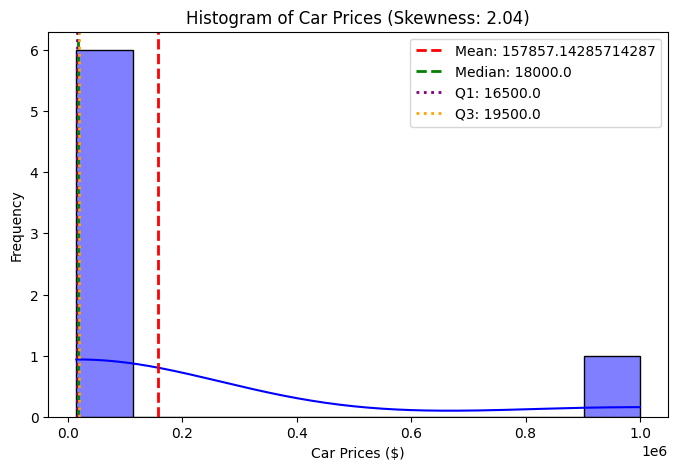

In [111]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, mode

car_prices_data = np.array([15000, 16000, 17000, 18000, 19000, 20000, 1000000])

df = pd.DataFrame(car_prices_data, columns=["Car Prices"])


mean_value = np.mean(car_prices_data)
median_value = np.median(car_prices_data)
mode_value = mode(car_prices_data, keepdims=True).mode[0]


Q1 = np.percentile(car_prices_data, 25)
Q3 = np.percentile(car_prices_data, 75)


IQR = Q3 - Q1


lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)


outliers = [x for x in car_prices_data if x < lower_bound or x > upper_bound]


skewness_value = skew(car_prices_data)


print("\n📌 **Statistical Summary of Car Prices:**")
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Q1 (25th Percentile): {Q1}")
print(f"Q3 (75th Percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Outlier Boundaries: Below {lower_bound} or Above {upper_bound}")
print(f"Outliers Detected: {outliers if outliers else 'None'}")
print(f"Skewness: {skewness_value}")


plt.figure(figsize=(8, 5))
sns.histplot(car_prices_data, bins=10, kde=True, color='blue')


plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value}")
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f"Median: {median_value}")
plt.axvline(Q1, color='purple', linestyle='dotted', linewidth=2, label=f"Q1: {Q1}")
plt.axvline(Q3, color='orange', linestyle='dotted', linewidth=2, label=f"Q3: {Q3}")

plt.title(f"Histogram of Car Prices (Skewness: {skewness_value:.2f})")
plt.xlabel("Car Prices ($)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


**Histogram with KDE (Kernel Density Estimate).**

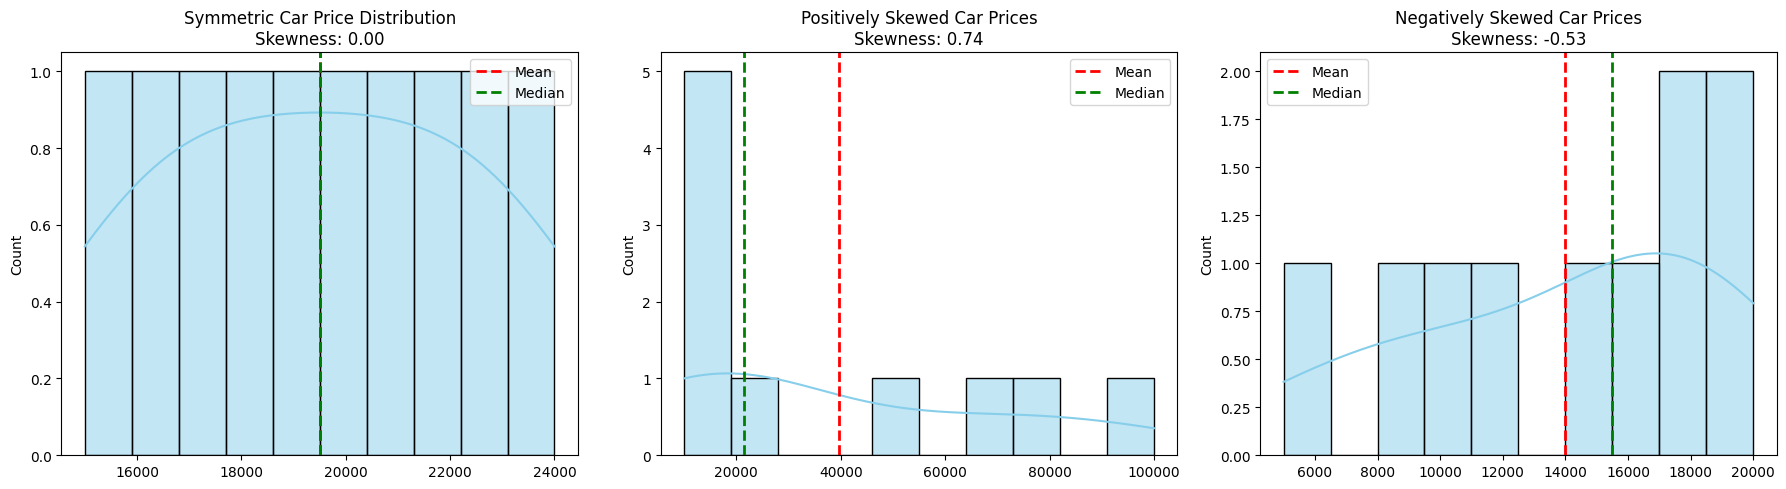

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew


symmetric_data = np.array([15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000])
positive_skew_data = np.array([10000, 12000, 15000, 16000, 18000, 25000, 50000, 70000, 80000, 100000])  # Expensive cars
negative_skew_data = np.array([5000, 8000, 10000, 12000, 15000, 16000, 17000, 18000, 19000, 20000])  # Cheap cars


fig, axes = plt.subplots(1, 3, figsize=(18, 5))


for ax, data, title in zip(
    axes,
    [symmetric_data, positive_skew_data, negative_skew_data],
    ["Symmetric Car Price Distribution", "Positively Skewed Car Prices", "Negatively Skewed Car Prices"]
):
    sns.histplot(data, kde=True, bins=10, ax=ax, color="skyblue")
    ax.axvline(np.mean(data), color='red', linestyle='dashed', linewidth=2, label="Mean")
    ax.axvline(np.median(data), color='green', linestyle='dashed', linewidth=2, label="Median")
    ax.set_title(f"{title}\nSkewness: {skew(data):.2f}")
    ax.legend()

plt.tight_layout()
plt.show()


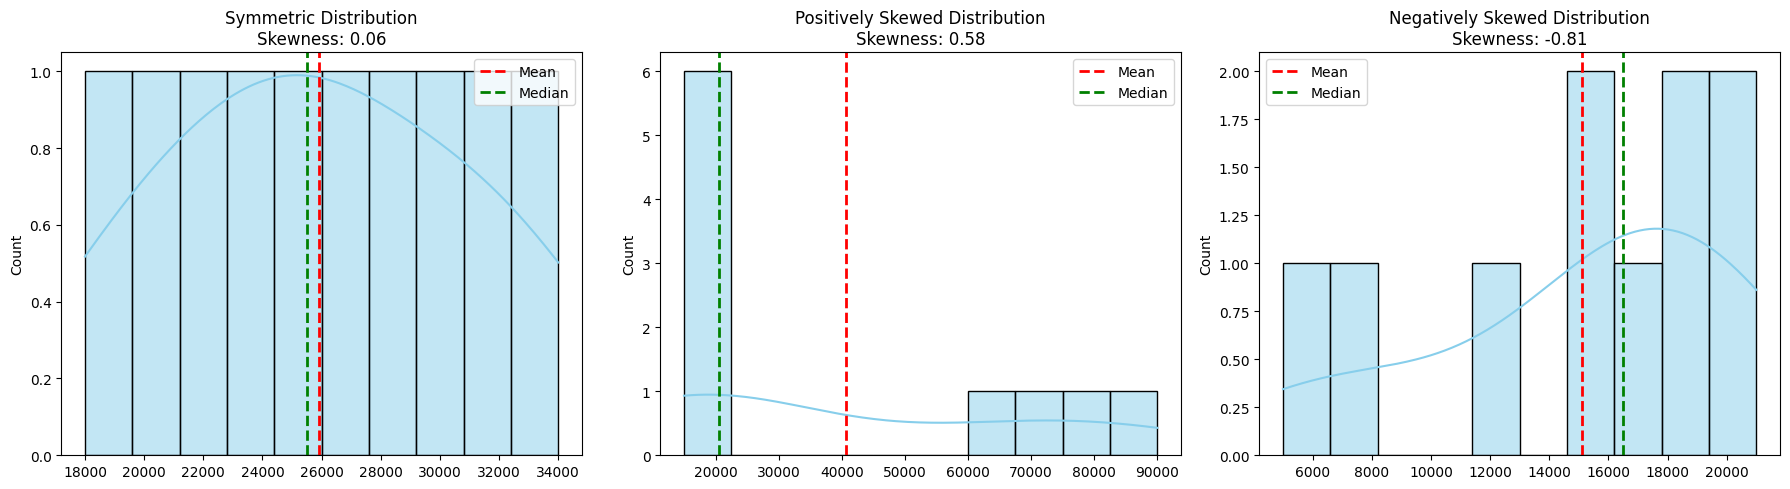

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew


symmetric_data = np.array([18000, 20000, 22000, 24000, 25000, 26000, 28000, 30000, 32000, 34000])
positive_skew_data = np.array([15000, 16000, 17000, 18000, 20000, 21000, 60000, 70000, 80000, 90000])  # High-priced cars
negative_skew_data = np.array([5000, 8000, 12000, 15000, 16000, 17000, 18000, 19000, 20000, 21000])  # Low-priced cars


fig, axes = plt.subplots(1, 3, figsize=(18, 5))


for ax, data, title in zip(
    axes,
    [symmetric_data, positive_skew_data, negative_skew_data],
    ["Symmetric Distribution", "Positively Skewed Distribution", "Negatively Skewed Distribution"]
):
    sns.histplot(data, kde=True, bins=10, ax=ax, color="skyblue")
    ax.axvline(np.mean(data), color='red', linestyle='dashed', linewidth=2, label="Mean")
    ax.axvline(np.median(data), color='green', linestyle='dashed', linewidth=2, label="Median")
    ax.set_title(f"{title}\nSkewness: {skew(data):.2f}")
    ax.legend()

plt.tight_layout()
plt.show()


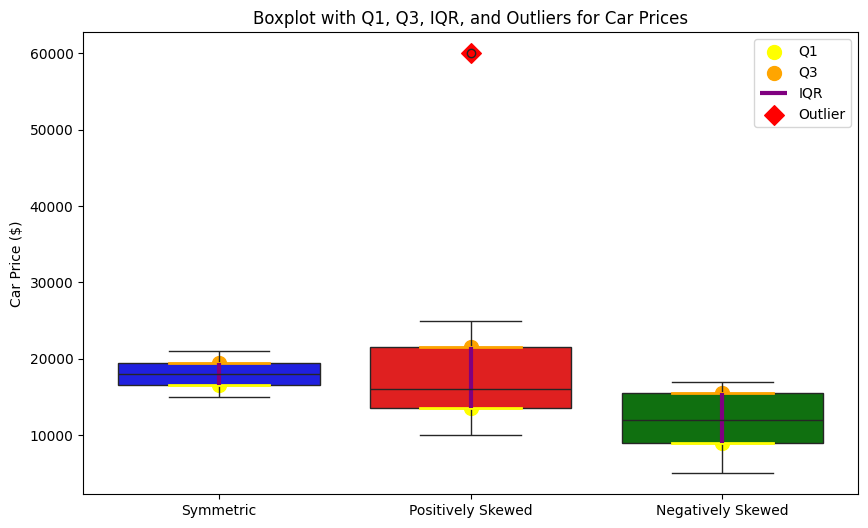

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


car_data = {
    "Symmetric": np.array([15000, 16000, 17000, 18000, 19000, 20000, 21000]),
    "Positively Skewed": np.array([10000, 12000, 15000, 16000, 18000, 25000, 60000]),  # Outlier: 60000
    "Negatively Skewed": np.array([5000, 8000, 10000, 12000, 15000, 16000, 17000])  # Outlier: 5000
}


plt.figure(figsize=(10, 6))


ax = sns.boxplot(data=list(car_data.values()), palette=["blue", "red", "green"])


for i, key in enumerate(car_data.keys()):
    dataset = car_data[key]


    Q1 = np.percentile(dataset, 25)
    Q3 = np.percentile(dataset, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    outliers = dataset[(dataset < lower_bound) | (dataset > upper_bound)]


    plt.scatter(i, Q1, color="yellow", marker="o", s=100, label="Q1" if i == 0 else "")
    plt.scatter(i, Q3, color="orange", marker="o", s=100, label="Q3" if i == 0 else "")
    plt.plot([i - 0.2, i + 0.2], [Q1, Q1], color="yellow", linewidth=2)  # Q1 line
    plt.plot([i - 0.2, i + 0.2], [Q3, Q3], color="orange", linewidth=2)  # Q3 line


    plt.vlines(i, Q1, Q3, color="purple", linewidth=3, label="IQR" if i == 0 else "")


    plt.scatter([i] * len(outliers), outliers, color="red", marker="D", s=100, label="Outlier" if i == 0 else "")


plt.xticks(ticks=[0, 1, 2], labels=car_data.keys())
plt.ylabel("Car Price ($)")
plt.title("Boxplot with Q1, Q3, IQR, and Outliers for Car Prices")
plt.legend()
plt.show()
